# Netflix Movie Data - Text Analysis

In [ ]:
# Importing commonly used packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Importing packages nessisary for text analysis
!pip install nltk
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
!pip install wordcloud
!pip install textblob
from textblob import TextBlob, Word
# Encoders
!pip install category_encoders
!pip install sklearn-pandas==1.5.0

     |████████████████████████████████| 1.5 MB 27.3 MB/s            
     |████████████████████████████████| 306 kB 104.9 MB/s            
     |████████████████████████████████| 78 kB 15.1 MB/s            
     |████████████████████████████████| 96 kB 11.4 MB/s             
     |████████████████████████████████| 765 kB 86.3 MB/s            
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


[nltk_data] Downloading package wordnet to /home/repl/nltk_data...


     |████████████████████████████████| 458 kB 32.1 MB/s            
     |████████████████████████████████| 17.1 MB 106.6 MB/s            
     |████████████████████████████████| 11.3 MB 92.5 MB/s            
     |████████████████████████████████| 3.2 MB 94.5 MB/s            
     |████████████████████████████████| 944 kB 96.0 MB/s            
     |████████████████████████████████| 98 kB 19.0 MB/s             
     |████████████████████████████████| 1.2 MB 93.6 MB/s            
     |████████████████████████████████| 40 kB 7.1 MB/s             
     |████████████████████████████████| 247 kB 111.4 MB/s            
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pythonwhat 2.23.1 requires dill~=0.2.7.1, but you have dill 0.3.3 which is incompatible.
pythonwhat 2.23.1 requires jinja2~=2.10, but you have jinja2 3.0.1 which is incompatible.
You should consider up

In [ ]:
# Load the data
df=pd.read_csv('Netflix_2.csv')

The dataset contains 9657 entries, however out target variable only has  4234 entries that are not null. 
We are going to drop the 4043 null entries and take a look at the dataset that results.

In [ ]:
# Selecting only the rows where the target is not null
df2 = df[df['rottentomatoes_tomatometer_score'].notna()]
# Dropping columns where there are a large number of null values
df2=df2.drop(['Unnamed: 0','rottentomatoes_cast', 'rottentomatoes_audience_review'], axis=1)   
# dropping all other rows where there are null values
ndf=df2.dropna()

Now that all null values have been removed, lets further refine the data

In [ ]:
from datetime import date
from datetime import datetime

# Renaming columns to better understand the dataset
ndf.rename(columns = {'rottentomatoes_audience_score':'audience_score', 'rottentomatoes_audience_#reviews':'number_audience_reviews','rottentomatoes_tomatometer_score':'tomatometer_score','rottentomatoes_critics_#reviews':'number_critics_reviews' }, inplace = True)
# Drop the title column. The oroiginal data contained a sting with movie/tv series names, not it appears to be a timestamp
ndf=ndf.drop(['title'], axis=1)   
# Date added to date time
ndf['date_added']=pd.to_datetime(df['date_added'], errors='ignore')
ndf['month_added']=ndf['date_added'].dt.month
ndf['year_added']=ndf['date_added'].dt.year
# Remove min and Seasons from the column, and change class to numeric
ndf['duration'] = ndf['duration'].map(lambda x:x.rstrip('minSeason'))
ndf['duration']=pd.to_numeric(ndf['duration'])
# drop rottentomatoes_info because the data is duplicated in other columns
ndf=ndf.drop(['rottentomatoes_info'], axis=1)

The dataset contains both movies and TV shows. I am going to focus on Movies for this analysis.

In [ ]:
Movies=ndf[ndf['type']=='Movie']

### Analysis of Description (Text Analysis)

In the following section, I will be analysing movie descriptions to identify common themes 

In [ ]:
!pip install --user -U nltk
!pip install -U textblob
!python -m textblob.download_corpora

nltk.download('punkt')
nltk.download('omw-1.4')
nltk.download('brown')
nltk.download("stopwords")

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from textblob import TextBlob as tb

ERROR: Can not combine '--user' and '--target'
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.
  Using cached textblob-0.17.1-py2.py3-none-any.whl (636 kB)
  Using cached nltk-3.7-py3-none-any.whl (1.5 MB)
  Using cached joblib-1.1.0-py2.py3-none-any.whl (306 kB)
  Using cached click-8.1.3-py3-none-any.whl (96 kB)
  Using cached tqdm-4.64.0-py2.py3-none-any.whl (78 kB)
  Using cached regex-2022.7.9-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (765 kB)
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.
/bin/bash: python: command not found


[nltk_data] Downloading package punkt to /home/repl/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package omw-1.4 to /home/repl/nltk_data...
[nltk_data] Downloading package brown to /home/repl/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.
[nltk_data] Downloading package stopwords to /home/repl/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /home/repl/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package omw-1.4 to /home/repl/nltk_data...
[nltk_data] Downloading package brown to /home/repl/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.
[nltk_data] Downloading package punkt to /home/repl/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
# -- Cleaning data
# Defining Stopwords
stop_words = set(stopwords.words("english"))
stop_words.add(('movie','a','the','s','S'))

# Remove stop words from descriptions
filtered_list = []
for word_tokens in Movies['description'].astype('str'):
    if word_tokens not in stop_words:
        filtered_list.append(word_tokens)
        
# Adding description back to the dataframe
Movies['description']=filtered_list

# Creating a summary of what the movie is about
subject=[]
for desc in Movies['description'].astype('str'):
    subject.append(tb(desc).noun_phrases)

Movies['subject']=subject
print(Movies['subject'])

0                               [earthquake hits, mexico]
5       [high school students attacks, trevor garfield...
25      [nerdy high schooler, dani, longtime crush, cr...
40      [fierce, mammoth hunter, d'leh, impossible jou...
48      [young parents-to-be, claire, ryan, suburban r...
                              ...                        
5363        [adventurous road trip/bachelor party, spain]
5368    [political cartoonist, crime reporter, san fra...
5370    [looking, dorky college student teams, urban r...
5371                 [drug dealer, own secret addictions]
5372    [dragged, civilian life, new crop, youthful sa...
Name: subject, Length: 1640, dtype: object


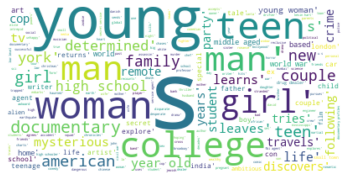

In [ ]:
#Importing Libraries for wordcloud
%matplotlib inline
from wordcloud import WordCloud
from textblob import TextBlob as tb

# Splitting the descprtions
about_split=[]
for x in Movies['subject'].astype('str'):
    about_split.append(x.split(','))

# After reading throught the descriptions, it looks as though the first element in the string provides a  
# consise summary of what the movie is about, for example for movie one 'earthquake hits' provides an
# high level idea of what the movie is about. So I am going to keep only the first element in each string
split_2=[]
for element in about_split:
    split_2.append(element[0])
    
Movies['subject_2']=split_2
    
# Using summaries to create word cloud
wordcloud = WordCloud(background_color='white')
wordcloud = wordcloud.generate(''.join(Movies['subject_2'].astype('str')))

# Display the generated Word Cloud
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

So we can see that the majority of movies appear to be about 'young' people, centering around teens or colledge.

Lest see if there is a differene between highly rated movies and below average rated movies

In [ ]:
# Determining the average critical review score
Movies['tomatometer_score'].describe()
# Splitting the dataset into abouve and below average movies
below_average = Movies[Movies['tomatometer_score']<64.40]
abouve_average = Movies[Movies['tomatometer_score']>=64.40]

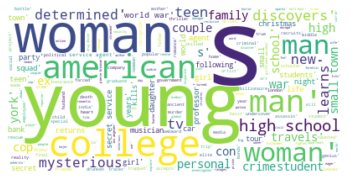

In [ ]:
# -- BELOW AVERAGE MOVIES
# Using summaries to create word cloud
wordcloud_below_average = WordCloud(background_color='white')
wordcloud_below_average = wordcloud.generate(''.join(below_average['subject_2'].astype('str')))

# Display the generated Word Cloud
plt.imshow(wordcloud_below_average, interpolation='bilinear')
plt.axis("off")
plt.show()

This word cloud looks to be similar to previous one. Common themes are 'woman','American', 'young','college'

Now lets look at abouve average movies

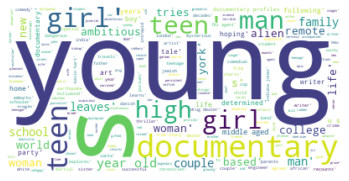

In [ ]:
# -- ABOUVE AVERAGE MOVIES
# Using summaries to create word cloud
wordcloud_abouve_average = WordCloud(background_color='white')
wordcloud_abouve_average = wordcloud.generate(''.join(abouve_average['subject_2'].astype('str')))

# Display the generated Word Cloud
plt.imshow(wordcloud_abouve_average, interpolation='bilinear')
plt.axis("off")
plt.show()

Again the themes are simmilar. This time most of the movies appear to be centered around being 'young'.

# Predicting Critical Scores from Reviews

In [ ]:
# creating a colum for sentiment so that we can determine if text is positive or negative
Movies['sentiment']=-1
Movies['sentiment']=np.where(Movies['tomatometer_score']>=64.403049,1,Movies['sentiment'])

In [ ]:
from textblob import TextBlob as tb

# Convert to lowercase and Tokenize words
words_tokens=[]
for words_descripton in Movies['rottentomatoes_critic_review']:
    words_tokens.append(word_tokenize(words_descripton.lower()))
Movies['rottentomatoes_critic_review']=words_tokens

# STOPWORDS
stop_words = set(stopwords.words("english"))
stop_words.add(('movie','a','the'))

# Remove stop words from descriptions
filtered_list = []
for word_tokens in Movies['rottentomatoes_critic_review'].astype('str'):
    if word_tokens not in stop_words:
        filtered_list.append(word_tokens)
        
# Adding description back to the dataframe
Movies['rottentomatoes_critic_review']=filtered_list

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report

# Defining independent and dependent variables
X=Movies[['rottentomatoes_critic_review']].astype('str')
y=Movies[['sentiment']]

# Splitting into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)
# Creating a vector of words and counts for training and test sights
vectorizer = CountVectorizer()
train_matrix= vectorizer.fit(X_train['rottentomatoes_critic_review'])
train_matrix= vectorizer.transform(X_train['rottentomatoes_critic_review'])
X_train_final = pd.DataFrame(train_matrix.toarray(),columns=vectorizer.get_feature_names())
y_train_final = y_train

test_matrix= vectorizer.transform(X_test['rottentomatoes_critic_review'])
X_test_final = pd.DataFrame(test_matrix.toarray(),columns=vectorizer.get_feature_names())
y_test_final = y_test

# logistic regression 
lr = LogisticRegression()
lr.fit(X_train_final,y_train_final)
y_pred= lr.predict(X_test_final)

new = np.asarray(y_test)
confusion_matrix(y_pred,y_test)

print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

          -1       0.70      0.76      0.73       168
           1       0.82      0.77      0.80       242

    accuracy                           0.77       410
   macro avg       0.76      0.76      0.76       410
weighted avg       0.77      0.77      0.77       410

